<a href="https://colab.research.google.com/github/ELIZAIVAN/Machine-Learning-Projects/blob/master/Health_insurance_charge_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df1=df.copy()

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

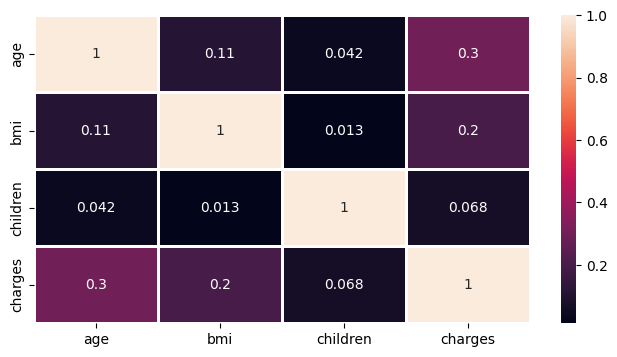

In [ ]:
#correlation between variables
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(8,4))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['sex','smoker','region']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find features with high correlation
threshold = 0.5  # Adjust the threshold as needed
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# Print the highly correlated features
for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are highly correlated.")

smoker and charges are highly correlated.
charges and smoker are highly correlated.


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Visualization**

<Axes: xlabel='charges'>

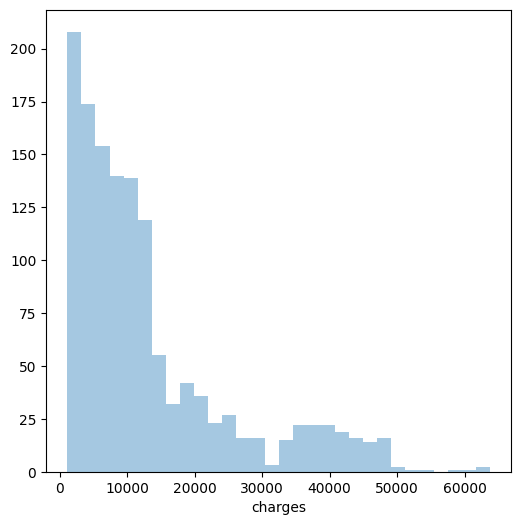

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(df1['charges'],kde=False)

<Axes: xlabel='age', ylabel='Density'>

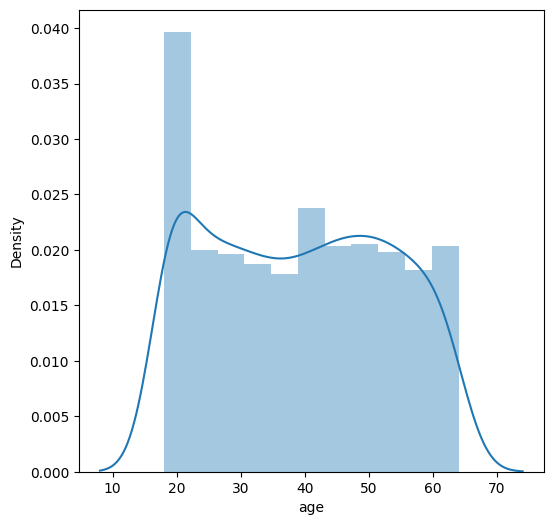

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(df1['age'])

In [ ]:
a=df1.groupby('age')['charges'].sum().reset_index()
a1=a.sort_values(by='charges',ascending=False)[['age','charges']].head(10)
a1

,age,charges
1,19,662857.834750
34,52,529431.821860
36,54,525239.301310
25,43,520216.523640
46,64,512061.678420
29,47,511965.988200
43,61,506562.525000
42,60,505526.625670
0,18,488949.011389
41,59,472396.738290


<Axes: xlabel='age', ylabel='charges'>

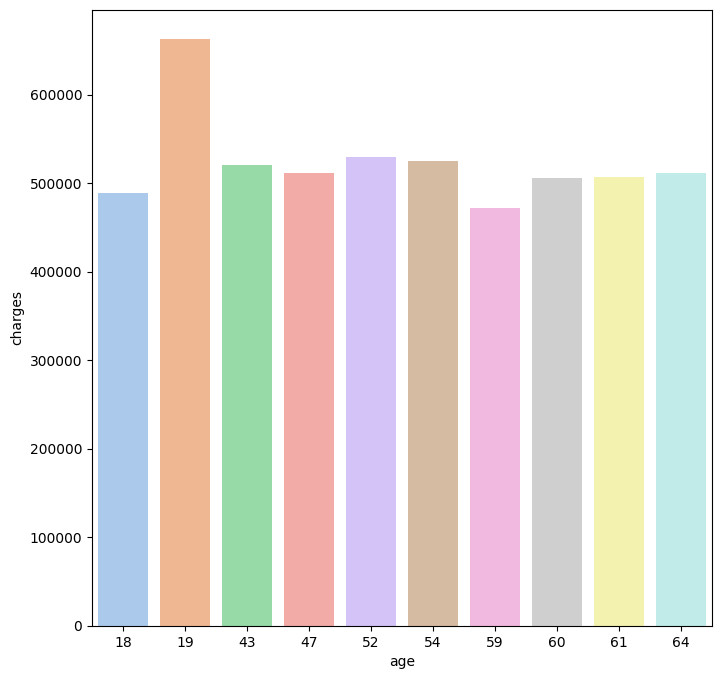

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(x='age',y='charges',data=a1,ax=ax,palette='pastel')

In [ ]:
c=df1.groupby('sex')['charges'].sum().reset_index()
c1=c.sort_values(by='charges')
c1

,sex,charges
0,female,8.321061e+06
1,male,9.434764e+06


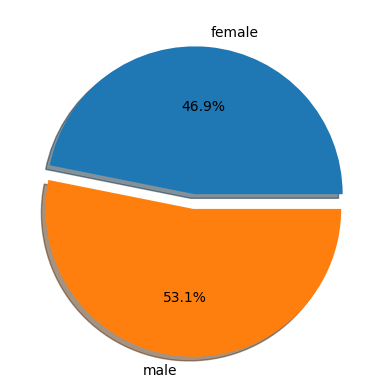

In [ ]:
y=c1['charges']
labels=['female','male']
myexplode=[0,0.1]
plt.pie(y,labels=labels,explode = myexplode,shadow=True,autopct='%1.1f%%')
plt.show()

In [ ]:
d=df1.groupby('region')['bmi'].sum().reset_index()
#a1=a.sort_values(by='charges',ascending=False)[['age','charges']].head(10)
d1=d.sort_values(by='bmi')
d1

,region,bmi
0,northeast,9452.215
1,northwest,9489.930
3,southwest,9943.900
2,southeast,12141.580


In [ ]:
size=[200, 400, 600, 800]
color=[1, 2, 3, 4]
px.scatter(d1, x='region', y='bmi',size=size, color=color)

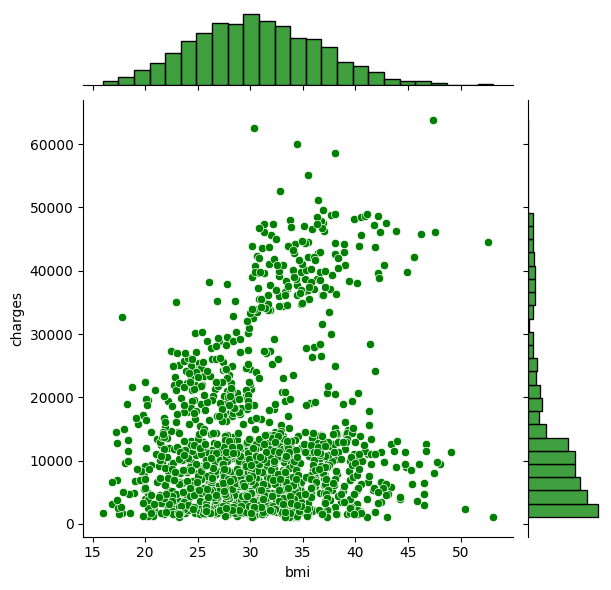

In [ ]:
sns.jointplot(data=df1, x=df1['bmi'], y=df1['charges'],color='g')

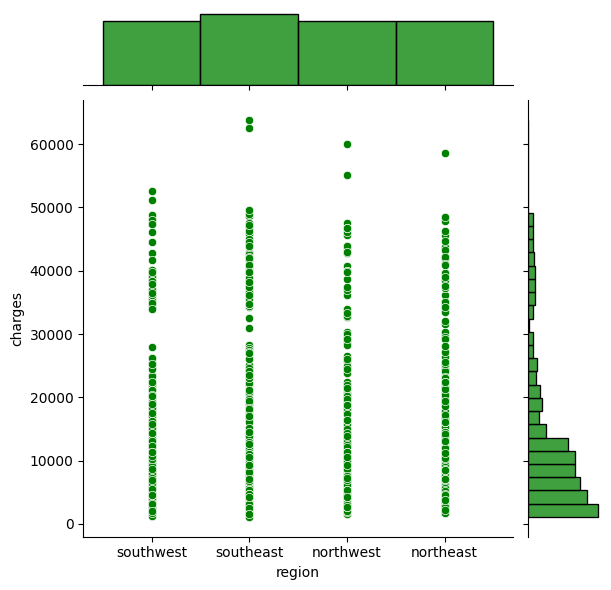

In [ ]:
sns.jointplot(data=df1, x=df1['region'], y=df1['charges'],color='g')

**Linear Regression**

In [ ]:
X=df.iloc[:,4:5]
X

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
y=df.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
ms=MinMaxScaler()
X_ms=ms.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape

(936, 1)

In [ ]:
y_train.shape

(936,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([ 8330.1539298 ,  8330.1539298 ,  8330.1539298 ,  8330.1539298 ,
        8330.1539298 , 32319.61386845,  8330.1539298 ,  8330.1539298 ,
        8330.1539298 , 32319.61386845,  8330.1539298 ,  8330.1539298 ,
        8330.1539298 ,  8330.1539298 ,  8330.1539298 ,  8330.1539298 ,
        8330.1539298 ,  8330.1539298 ,  8330.1539298 ,  8330.1539298 ,
        8330.1539298 , 32319.61386845,  8330.1539298 ,  8330.1539298 ,
        8330.1539298 ,  8330.1539298 ,  8330.1539298 ,  8330.1539298 ,
        8330.1539298 ,  8330.1539298 ,  8330.1539298 ,  8330.1539298 ,
       32319.61386845, 32319.61386845, 32319.61386845,  8330.1539298 ,
       32319.61386845, 32319.61386845,  8330.1539298 , 32319.61386845,
        8330.1539298 ,  8330.1539298 ,  8330.1539298 ,  8330.1539298 ,
        8330.1539298 ,  8330.1539298 ,  8330.1539298 , 32319.61386845,
        8330.1539298 ,  8330.1539298 ,  8330.1539298 ,  8330.1539298 ,
        8330.1539298 ,  8330.1539298 , 32319.61386845,  8330.1539298 ,
      

Text(0, 0.5, 'charges')

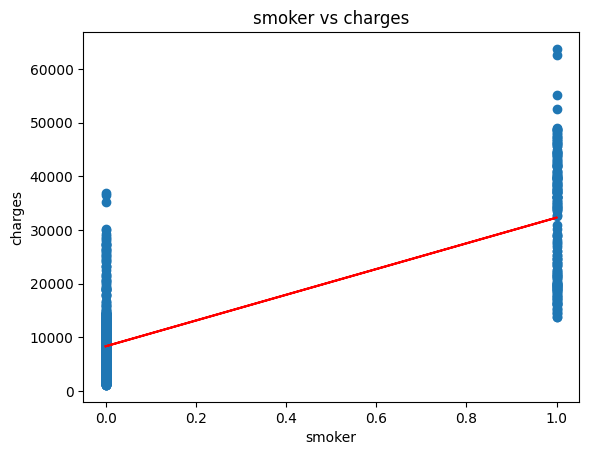

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,color='red')
plt.title('smoker vs charges')
plt.xlabel('smoker')
plt.ylabel('charges')

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

mean absolute error: 5755.270752912443
mean squared error: 58830309.60850396
Root mean squared error: 7670.0918904863165
r2_score: 0.5848737597563067


**MultiLinear Regression**

In [ ]:
x=df.iloc[:,:-1]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y=df.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =1)

In [ ]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [ ]:
#MULTIPLE REG MODEL BUILDING
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_pred1=mlr.predict(X_test)
y_pred1

array([ 4.50048433e+03,  1.28194579e+04,  1.23977127e+04,  1.34303433e+04,
        5.31776110e+02,  3.22642696e+04,  1.30762461e+04,  1.22348298e+04,
        3.82932402e+03,  3.01565286e+04,  1.13198257e+04,  1.72084618e+04,
        8.91832075e+03,  8.22883518e+03,  3.58166904e+03,  1.01918742e+04,
        3.97134424e+03,  6.75521017e+03,  1.52141457e+04,  1.42498228e+04,
        1.24184207e+04,  3.34497470e+04,  9.12417099e+03,  8.85380484e+03,
        3.13406481e+03,  8.14417612e+03,  9.33914668e+03,  1.10793027e+04,
        7.54531559e+03,  4.40537383e+03,  1.39112972e+04,  5.64886526e+03,
        3.46827850e+04,  2.74022377e+04,  3.38105315e+04,  9.52560370e+03,
        3.06087668e+04,  2.67066855e+04,  1.54113111e+04,  3.41398489e+04,
        6.63468968e+03,  1.39736793e+04,  1.08971678e+04,  1.47980620e+04,
        4.09741953e+03,  1.29622798e+04,  4.71597335e+03,  2.92771692e+04,
        7.31791501e+03,  1.39529721e+04,  1.35190763e+04,  1.20798653e+04,
        2.00264361e+03,  

In [ ]:
#MULTIPLE REG PERFORMANCE_MEASURE
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean absolute error",mean_absolute_error(y_test,y_pred1))
print("mean squred error",mean_squared_error(y_test,y_pred1))
print("root mean squred error",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("r2_score",r2_score(y_test,y_pred1))

mean absolute error 4139.313074268247
mean squred error 36794223.34351702
root mean squred error 6065.824209744049
r2_score 0.7403677168975318


**Random Forest**

In [ ]:
rs=RandomForestRegressor()
rs.fit(X_train,y_train)
y_pred2=rs.predict(X_test)
y_pred2

array([ 2000.3619673 , 12733.9634582 ,  9054.7446371 , 10719.6087199 ,
        2538.1590268 , 38916.1101199 , 10133.6235926 , 11639.1045025 ,
        5040.2857017 , 20046.6674229 , 15847.9520455 , 12856.3712601 ,
        6855.9895695 ,  6887.5471365 ,  1894.8869665 , 11542.1487592 ,
        6122.7887758 ,  6891.9702763 , 16261.6244636 , 13518.073689  ,
        9987.0250977 , 39801.8037443 , 10329.2736881 ,  9403.3631584 ,
       15572.05971883,  6671.3434935 ,  8901.878641  ,  9158.5325907 ,
        7502.0639503 ,  3838.0605215 , 12668.6761535 ,  6792.098257  ,
       25934.2660169 , 34841.2405512 , 25339.1812747 , 14673.4882968 ,
       39368.4992937 , 17640.6964564 , 14605.6767057 , 44322.2769808 ,
        7477.5382788 , 11832.189191  , 11395.3352505 , 19870.7033009 ,
        7700.7890799 , 13233.8868139 ,  1885.7918125 , 34880.2593483 ,
        9629.0895834 , 18432.9410803 , 15416.7802861 , 15152.7413304 ,
        7312.5390009 , 11992.1456442 , 18165.8967856 ,  6430.7354577 ,
      

In [ ]:
print("mean absolute error:",mean_absolute_error(y_test,y_pred2))
print("mean squared error:",mean_squared_error(y_test,y_pred2))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("R2 score:",r2_score(y_test,y_pred2))

mean absolute error: 2734.7211683050496
mean squared error: 23644433.215599913
root mean squared error: 4862.554186392159
R2 score: 0.8331570116016138


**Gradient Boosting Regressor**

In [ ]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred3=gb.predict(X_test)
y_pred3

array([ 3483.03980319, 12245.83600646,  9943.80551795, 10665.51379362,
        2263.70388354, 37314.7183681 , 10432.0992109 , 11863.80959476,
        4599.58937382, 21201.93882047, 15759.03033029, 13542.08483509,
        7430.05525426,  7401.03674269,  2638.4697055 , 10407.76432425,
        5522.49919478,  7243.71520143, 14860.91329778, 14570.94902971,
       12854.78012102, 38938.19906153,  9613.82533367, 10102.50556798,
        4309.48060428,  7441.0401378 ,  8791.39000367,  9711.92538665,
        6786.06520626,  5676.28678434, 13455.77035255,  6417.88756758,
       24591.24653859, 34291.37074623, 24352.07206308, 12661.81958481,
       37905.65411889, 17384.79228764, 13553.07047973, 42826.95646434,
        6533.14089481, 12291.83590303, 12103.65951476, 14958.16736813,
        6594.67686417, 14170.26836552,  3091.80829452, 34944.99991842,
        9857.80518801, 18416.42335117, 14686.80393127, 15500.15902666,
        4110.76668901,  9770.70868437, 17803.58305652,  4379.13225278,
      

In [ ]:
print("mean absolute error:",mean_absolute_error(y_test,y_pred3))
print("mean squared error:",mean_squared_error(y_test,y_pred3))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("R2 score:",r2_score(y_test,y_pred3))

mean absolute error: 2443.6691438134408
mean squared error: 19259424.289868288
root mean squared error: 4388.556059784162
R2 score: 0.8640990936829034


**XGB Regressor**

In [ ]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred4=xgb.predict(X_test)
y_pred4

array([ 3981.944  , 11791.008  , 10135.849  ,  9559.768  ,  1742.1016 ,
       36353.02   , 11359.841  , 11261.298  ,  2869.099  , 20552.98   ,
       14893.354  , 11667.651  ,  6076.426  ,  6738.2573 ,  1242.1586 ,
        8217.434  ,  5340.981  ,  5963.9023 , 14849.948  , 13619.587  ,
        7391.376  , 41583.137  ,  8184.8047 ,  9909.084  , 20114.793  ,
        6350.328  ,  6680.7134 ,  8426.522  ,  6539.949  ,  1461.9119 ,
       11135.29   ,  4330.5034 , 22538.092  , 34071.84   , 25781.164  ,
       14921.363  , 37377.043  , 16864.041  , 14850.298  , 50199.527  ,
        6202.335  , 11810.851  , 11710.991  , 18872.709  ,  5774.836  ,
       13069.627  ,  1628.0925 , 33641.12   ,  9704.71   , 15760.326  ,
       14118.277  , 12646.3545 ,  3560.3926 , 10439.416  , 21947.924  ,
        4202.2314 , 41839.285  , 14183.631  , 11765.911  ,   479.82028,
        2264.9912 , 13795.297  , 26784.152  ,  6917.788  , 14810.4    ,
        8841.898  , 10897.383  , 12783.782  ,  6289.4995 , 22459

In [ ]:
print("mean absolute error:",mean_absolute_error(y_test,y_pred4))
print("mean squared error:",mean_squared_error(y_test,y_pred4))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred4)))
print("R2 score:",r2_score(y_test,y_pred4))

mean absolute error: 3042.9136164413285
mean squared error: 27529065.7368559
root mean squared error: 5246.814818235526
R2 score: 0.805745751929367


**Here we can see that Gradient Boost model is more eficient than any other model.**